In [45]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

all_crash_severity_words = {
    'accident': 0.3,
    'injury': 0.4,
    'serious injury': 0.7,
    'fatal': 1.0,
    'collided': 0.6,
    'crash': 0.8,
    'hit': 0.5,
    'ran over': 0.9,
    'hospitalized': 0.6,
    'injured': 0.5,
    'pedestrian': 0.4,
    'bike': 0.4,
    'e-bike': 0.5,
    'electrical': 0.3,
    'speeding': 0.8,
    'dangerous': 0.7,
    'overturned': 0.9,
    'seriously': 0.7,
    'damaged': 0.6,
    'scooter': 0.4,
    'trauma': 0.9,
    'cyclist': 0.5,
    'helmet': 0.4,
    'intersection': 0.6,
    'driver': 0.7,
    'traffic': 0.6,
    'road': 0.5,
    'bicycle': 0.4,
    'brake': 0.4,
    'impact': 0.7,
    'vehicle': 0.7
}


# Initialize NLTK tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text (tokenization, lowercasing, lemmatization, remove numbers and special characters)
def preprocess_text(text):
    # Check if the text is a string and not NaN
    if isinstance(text, str):
        # Lowercase the text
        text = text.lower()

        # Remove numbers and special characters (keep only alphabetic characters)
        text = re.sub(r'[^a-z\s]', '', text)

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords and lemmatize the tokens
        processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

        return ' '.join(processed_tokens)
    else:
        # Return an empty string if the text is not a valid string
        return ''

# Function to calculate severity score for an article
def calculate_severity(article):
    # Preprocess the article text
    article = preprocess_text(article)
    
    score = 0
    for word, value in all_crash_severity_words.items():
        if word in article:
            score += value
    return score

# Load the CSV files
etrans_df = pd.read_csv('etrans.csv')
tradtrans_df = pd.read_csv('tradtrans.csv')

# Calculate severity scores for e-bike crashes
etrans_df['severity_score'] = etrans_df['translated_article'].apply(calculate_severity)

# Calculate severity scores for traditional bike crashes
tradtrans_df['severity_score'] = tradtrans_df['translated_article'].apply(calculate_severity)

# Calculate the average severity for e-bike crashes
avg_ebike_severity = etrans_df['severity_score'].mean()

# Calculate the average severity for traditional bike crashes
avg_trad_severity = tradtrans_df['severity_score'].mean()

# Print the results
print(f"Average severity for e-bike crashes: {avg_ebike_severity}")
print(f"Average severity for traditional bike crashes: {avg_trad_severity}")


Average severity for e-bike crashes: 2.9836363636363634
Average severity for traditional bike crashes: 3.2849056603773583


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annaklinker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annaklinker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/annaklinker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annaklinker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annaklinker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/annaklinker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Average severity for e-bike crashes: 2.9072727272727272
Average severity for traditional bike crashes: 3.2261044176706823


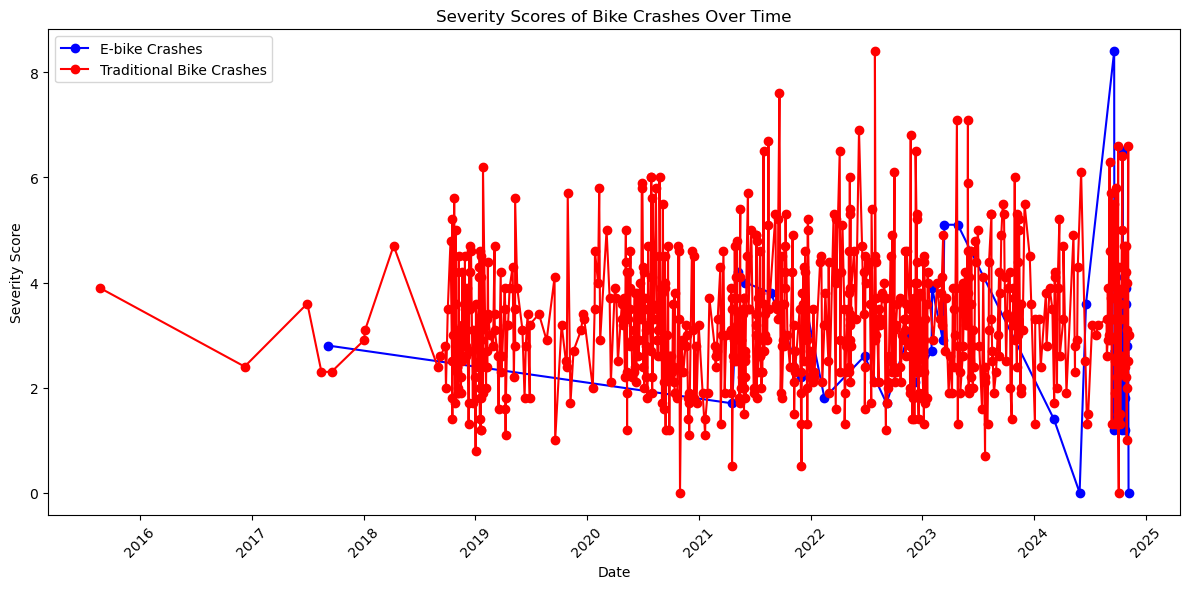

In [55]:
# Convert 'date' column to datetime
etrans_df['date'] = pd.to_datetime(etrans_df['date'], errors='coerce')
tradtrans_df['date'] = pd.to_datetime(tradtrans_df['date'], errors='coerce')

# Sort both DataFrames by the 'date' column to ensure proper time alignment
etrans_df = etrans_df.sort_values(by='date')
tradtrans_df = tradtrans_df.sort_values(by='date')

# Calculate severity scores for e-bike crashes
etrans_df['severity_score'] = etrans_df['translated_article'].apply(calculate_severity)

# Calculate severity scores for traditional bike crashes
tradtrans_df['severity_score'] = tradtrans_df['translated_article'].apply(calculate_severity)

# Calculate the average severity for e-bike crashes
avg_ebike_severity = etrans_df['severity_score'].mean()

# Calculate the average severity for traditional bike crashes
avg_trad_severity = tradtrans_df['severity_score'].mean()

# Print the results
print(f"Average severity for e-bike crashes: {avg_ebike_severity}")
print(f"Average severity for traditional bike crashes: {avg_trad_severity}")

# Plot the severity scores over time for both datasets
plt.figure(figsize=(12, 6))
plt.plot(etrans_df['date'], etrans_df['severity_score'], label='E-bike Crashes', marker='o', color='blue')
plt.plot(tradtrans_df['date'], tradtrans_df['severity_score'], label='Traditional Bike Crashes', marker='o', color='red')
plt.xlabel('Date')
plt.ylabel('Severity Score')
plt.title('Severity Scores of Bike Crashes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annaklinker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annaklinker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/annaklinker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


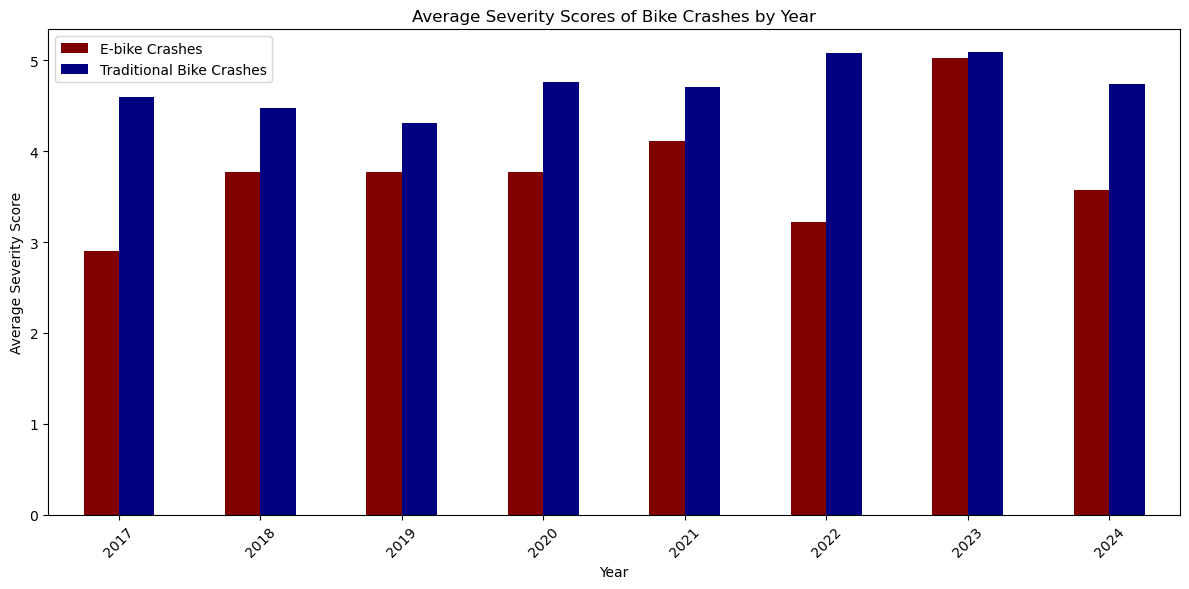

In [68]:
# Load the CSV files
etrans_df = pd.read_csv('etrans.csv')
tradtrans_df = pd.read_csv('tradtransog.csv')

# Calculate severity scores for e-bike crashes
etrans_df['severity_score'] = etrans_df['translated_article'].apply(calculate_severity)

# Calculate severity scores for traditional bike crashes
tradtrans_df['severity_score'] = tradtrans_df['translated_article'].apply(calculate_severity)

# Convert the 'date' column to datetime format for both datasets
etrans_df['date'] = pd.to_datetime(etrans_df['date'], errors='coerce')
tradtrans_df['date'] = pd.to_datetime(tradtrans_df['date'], errors='coerce')

# Extract the year from the 'date' column, and drop any rows where 'year' is NaT
etrans_df['year'] = etrans_df['date'].dt.year
tradtrans_df['year'] = tradtrans_df['date'].dt.year

# Drop rows where 'year' is NaT
etrans_df = etrans_df.dropna(subset=['year'])
tradtrans_df = tradtrans_df.dropna(subset=['year'])

# Calculate the average severity score for each year in both datasets
ebike_yearly_severity = etrans_df.groupby('year')['severity_score'].mean()
trad_yearly_severity = tradtrans_df.groupby('year')['severity_score'].mean()

# Ensure that the years cover the full range of years for both datasets
years_range = list(range(int(etrans_df['year'].min()), int(etrans_df['year'].max()) + 1))

# Reindex to cover all years in the range, filling missing years with the average severity
ebike_yearly_severity = ebike_yearly_severity.reindex(years_range, fill_value=ebike_yearly_severity.mean())
trad_yearly_severity = trad_yearly_severity.reindex(years_range, fill_value=trad_yearly_severity.mean())

# Create a DataFrame to hold the yearly data for both e-bike and traditional bike crashes
yearly_severity = pd.DataFrame({
    'E-bike Crashes': ebike_yearly_severity,
    'Traditional Bike Crashes': trad_yearly_severity
})

# Plot the comparative bar chart
yearly_severity.plot(kind='bar', figsize=(12, 6), color=['maroon', 'navy'])
plt.title('Average Severity Scores of Bike Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Average Severity Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


all_crash_severity_words = {
    'accident': 0.3,
    'injury': 0.4,
    'serious injury': 0.7,
    'fatal': 1.0,
    'collided': 0.6,
    'crash': 0.8,
    'hit': 0.5,
    'ran over': 0.9,
    'hospitalized': 0.6,
    'injured': 0.5,
    'pedestrian': 0.4,
    'bike': 0.1,  
    'bicycle': 0.1,  
    'e-bike': 0.9,  
    'electrical': 0.3,
    'speeding': 0.8,
    'dangerous': 0.7,
    'overturned': 0.9,
    'seriously': 0.7,
    'damaged': 0.6,
    'scooter': 0.4,
    'trauma': 0.9,
    'cyclist': 0.5,
    'helmet': 0.4,
    'intersection': 0.6,
    'driver': 0.7,
    'traffic': 0.6,
    'road': 0.5,
    'bicycle': 0.1,  
    'brake': 0.4,
    'impact': 0.7,
    'vehicle': 0.7
}